# **Water Potability Test Through Machine Learning Models**
By Daniel Chey

Water Potability is a measure of whether or not a water is drinkable or not. If a water is potable, it means that the water is drinkable (and referred to as 1 on the csv file (meaning true)). The data collects water from 3277 samples of water, and measures the acidity (through ph values 0-14), hardness (mg/L ,capacity of water to precipitate soap), Solids(ppm, total disolved solids), Chloramines(ppm, amount of Chloramines), Sulfate(ppm, amount of Sulfates dissolved), Conductivity (Electrical conductivity of water in μS/cm), Organic Carbon (ppm, amount of Organic Carbon, Trihalomethanes (Amount of Trihalomethanes in μg/L), Turbidity (measure of light emiting property of water in NTU (Nephelometric Turbidity Units), and Potability (whether the water is drinkable or not). Through machine learning models, the model can determine whether or not the water will be potable through the 9 characteristics of the water, and whether the combination of all the 9 characteristics of water would fit in to water being potable or not. The machine learning models will intake the CSV file and compare the characteristics of water to determine whether or not a new sample of water (with the 9 characteristics) will be potable or not. A succesful model will be able to determine potability with a high degree of accuracy, that is the mission.

The model will be so important because all the charactersitics of water could easily be measured using certain measuring devices, but even with all the data it could still be difficult to determine whether or not the water is potable or not. Therefore the model could be able to determine the if certain types of water is healthy to drink, especially in developing countries where water is limited and full-proof water saftey technologies could be limited. Through merely measuring the characterisitcs of water, the person could determine whether or not the water is potable or not.

The current project basically relies on different characteristics of water to determine whether or not water is potable or not, for example there has not been an experiment where the machine determined water is potable only with the specefic combination of charactersitics given, and therefore when the tools are availble to measure all the charactersitics of water given above, the user can easily determine the potability of water. Instead of using a device that measures the potability of water at once, this device allows to measure certain charactersitics of water than determine whether or not the water is potable or not.

The data was downloaded through a kaggle dataset.
Link: https://www.kaggle.com/datasets/adityakadiwal/water-potability
The csv file is also in the google colab file directory.


In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
files.upload()
#water_potability.csv is added to the file directory so that the path could be copied and accessed.

Saving water_potability.csv to water_potability.csv


{'water_potability.csv': b'ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability\r\n,204.8904554713363,20791.318980747026,7.300211873184757,368.51644134980336,564.3086541722439,10.3797830780847,86.9909704615088,2.9631353806316407,0\r\n3.71608007538699,129.42292051494425,18630.057857970347,6.635245883862,,592.8853591348523,15.180013116357259,56.32907628451764,4.500656274942408,0\r\n8.099124189298397,224.23625939355776,19909.541732292393,9.275883602694089,,418.6062130644815,16.868636929550973,66.42009251176368,3.0559337496641685,0\r\n8.316765884214679,214.37339408562252,22018.417440775294,8.05933237743854,356.88613564305666,363.2665161642437,18.436524495493302,100.34167436508008,4.628770536837084,0\r\n9.092223456290965,181.10150923612525,17978.98633892625,6.546599974207941,310.13573752420444,398.41081338184466,11.558279443446395,31.997992727424737,4.075075425430034,0\r\n5.584086638456089,188.3133237696164,28748.68773904612,7.5448687887796

In [ ]:
#training dataset
training_data = "/content/water_potability.csv"
#Creating a path for the code to access the water_potability.csv data file.

In [ ]:
#printing the training dataset
df = pd.read_csv(training_data)
print(df.head())
df.isnull().sum()
#According to the dataframe, data points of ph, Sulfate, and Trihalomethanes has missing data for certain water samples.


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

The first true problem that was encountered was when analyzing the dataset, according to the dataset certain columns contain missing data for certain data samples. Certain water samples contain missing data on the ph, Sulfate, and Trihalomethanes of the water. Therefore; instead, of making up data which could lead to even more problematic and faulty results, it was a better idea to rather remove the columns from the dataset all together. So therefore, the dataset only includes Hardness, Solids, Chloramines, Conductivity, Organic cabron, Turbidity of the water and removes the ph, Sulfate, and Trihalomethanes data of the water. Even though accuracy is lost as there are less data points to determine whether or not a water is potable, it is still better than using faulty made up data which leads to faulty results.

            ph    Hardness        Solids  Chloramines     Sulfate  \
3243  6.125810  241.443535   8810.895810     5.740321  369.022715   
696   9.545271  212.046391  25189.830622     6.203869  316.567319   
645   0.000000  241.895515  25717.936178     4.239997  369.541143   
354   2.798549  311.383956  26931.243483     7.116897    0.000000   
774   0.000000  231.159824  12856.728623     6.977019  344.447737   
...        ...         ...           ...          ...         ...   
702   6.436444  192.995665  19579.389546     7.640874  314.922739   
1387  8.397248  199.495811  16772.226246     8.117218  343.403764   
20    0.000000  227.435048  22305.567414    10.333918    0.000000   
1971  6.333640  185.436340  18506.288609     6.572682  356.971033   
715   0.000000  193.410141  14472.391549     5.640672  322.674462   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3243    367.967943       16.816507        47.661727   4.953058           1  
696     498.26695

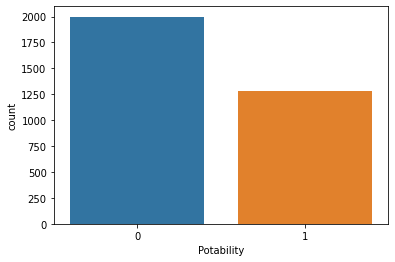

In [ ]:
#we must shuffle the data as we don't know if all the potatabiilty = 1 is at the bottom of the df
sns.countplot(x = 'Potability', data = df)
#Testing the count of potable and non-potable water to determine whether there is enough data for potable water and non-potable water
shuffled = df.sample(frac=1)
print(shuffled)
#Turns out the ratio of potable and non-potable data is around 0.4-0.6, there is enough data for both potable and non-potable water and there is no data that is disproportionatley represented

      Hardness    Solids  Chloramines  Conductivity  Organic_carbon  Turbidity
3243  1.370875 -1.505741    -0.872951     -0.720542        0.765240   1.263831
696   0.476795  0.362173    -0.580138      0.891589        1.743128   1.303358
645   1.384621  0.422400    -1.820673      0.602944        0.308659   0.434956
354   3.498032  0.560770    -0.003398      1.174593       -0.015059  -0.388955
774   1.058108 -1.044339    -0.091756     -0.416809       -0.322762  -0.843807
(3276, 6)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


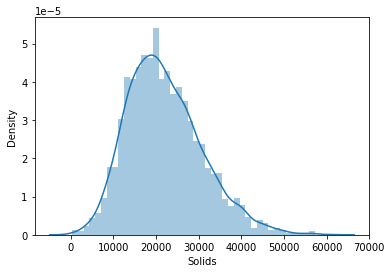

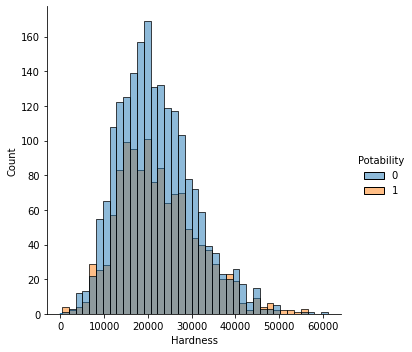

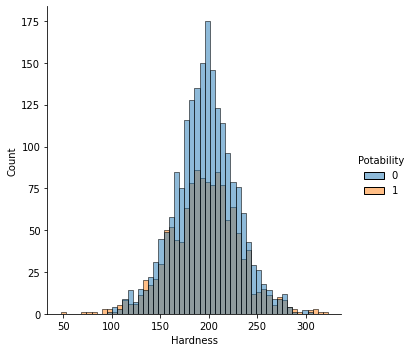

In [ ]:
#splitting the data into X and Y
X_data = shuffled.drop(['ph','Sulfate', 'Trihalomethanes', 'Potability'], axis = 1)
#indexes of columns dropped due to faulty data (some indexes have no data in the columns)
#The X_data is basically all the data that is required to determine whether or not a water is potable, the Y_data will be the result of the X_Data which would detect if the water is potable or not.
Y_data = shuffled['Potability']
X_data = (X_data - X_data.mean()) / X_data.std()
#Without adjusting the dataset, a sparse categorigal loss function is not possible because it reqruiers the outputs to be between 0 and 1, if the number is 100+ the data will not fit into a sparse categorical loss function, therefore adjustments are required
print(X_data.head())

print(X_data.shape)


#Data analysis using sns.distplot and sns.displot

#Remember that potable water count is lower than non-potable water count as the ratio of non-potable water is higher than potable water
#We are not comparing, count, only the distribution of the chracteristics of the water and comparing it to potability.
import seaborn as sns

sns.distplot(shuffled['Solids'], kde = True, bins = 45)
sns.displot(data=shuffled, x=shuffled['Solids'], hue = shuffled['Potability'])
#Solids: Distribution of Potable water is skewed slightly skewed right more than non-potable water; however the distributions are very similar.




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


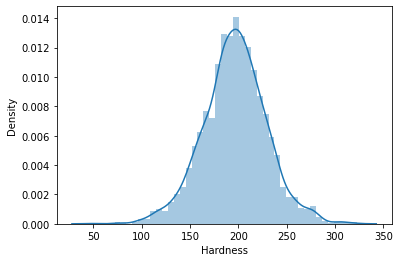

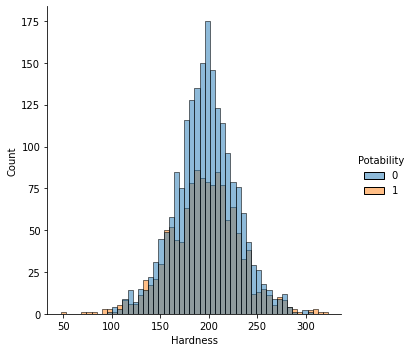

In [ ]:
sns.distplot(shuffled['Hardness'], kde = True, bins = 45)
sns.displot(data=shuffled, x=shuffled['Hardness'], hue = shuffled['Potability'])
#Hardness: The distribution of non-potable water is more unimodal than potable water; however, distributions are still very similar

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


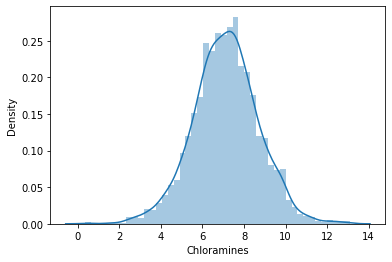

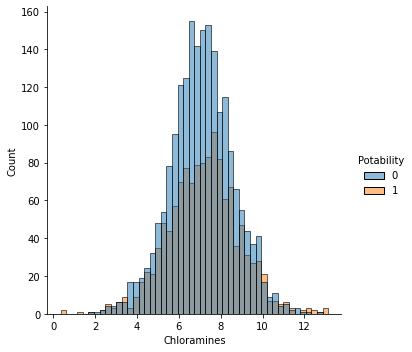

In [ ]:
sns.distplot(shuffled['Chloramines'], kde = True, bins = 45)
sns.displot(data=shuffled, x=shuffled['Chloramines'], hue = shuffled['Potability'])
#Chloramines: The distribution of non-potable and potable water is very similar (Potable water slightly skewed to the left while non-potable water has no apparent skew)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


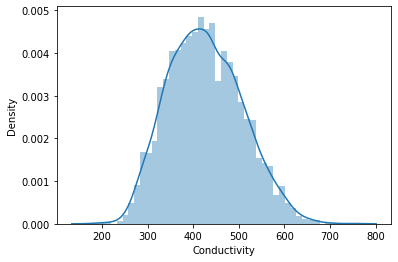

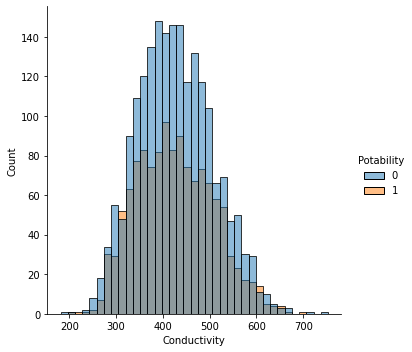

In [ ]:
sns.distplot(shuffled['Conductivity'], kde = True, bins = 45)
sns.displot(data=shuffled, x=shuffled['Conductivity'], hue = shuffled['Potability'])
#Conductivity: The distribution of non-potable and potable water is very similar

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


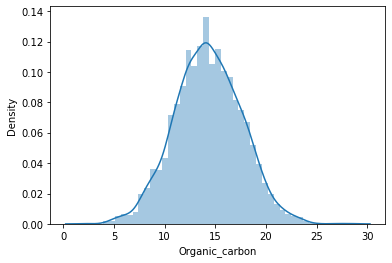

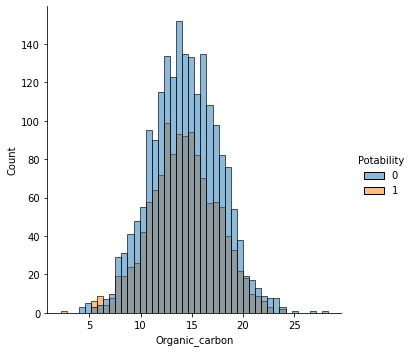

In [ ]:
sns.distplot(shuffled['Organic_carbon'], kde = True, bins = 45)
sns.displot(data=shuffled, x=shuffled['Organic_carbon'], hue = shuffled['Potability'])
#Organic_carbon: The distribution of non-potable and potable water is very similar

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


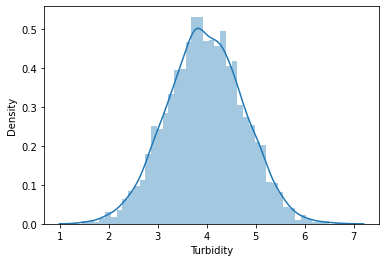

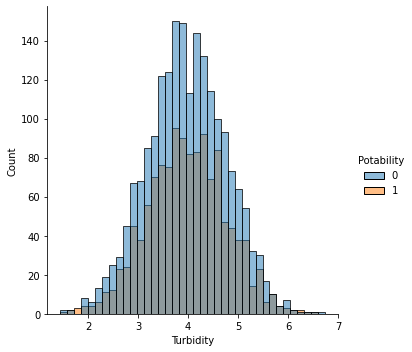

In [ ]:
sns.distplot(shuffled['Turbidity'], kde = True, bins = 45)
sns.displot(data=shuffled, x=shuffled['Turbidity'], hue = shuffled['Potability'])
#Organic_carbon: The distribution of non-potable and potable water is very similar

**Data Analysis through seaborn distribution plots**

It was logical to attempt to find certain characteristics with potable and non-potable water. By comparing the distribution of characteristics in potable and non-potable water and potable water, it is easier to find certain patterns and trends that may explain the reason for the machine being able to dissect certain characteristics of potable and non-potable water. For example, if the distribution of Organic Carbon is very different among potable and non-potable water, it is significantly easier for models to detect that water with higher x-characteristics will not be potable. The opposite could be said true, if the distributions are very similar (which is this case), it may be significantly more difficult for models to detect whether the water is potable as characteristics among potable and non-potable water are so similar. As the distribution is so similar among all 6 characteristics, it is now upon the model to determine the certain combinations of characteristics which would lead to water potability or not, and that is for the model to determine. However, as distribution of certain characteristics is so similar among potable and non-potable water, accuracy rates regardless of any model may be significantly lower as the differences between potable and non-potable water are so obscure.

In [ ]:
#Check is Y_data is evenly distributed with no anomolies
print(Y_data)
print(Y_data.shape)

3243    1
696     1
645     0
354     1
774     1
       ..
702     1
1387    0
20      0
1971    1
715     1
Name: Potability, Length: 3276, dtype: int64
(3276,)


In [ ]:
#Splitting the data into training and testing datasets, the creator of the dataset only gave one csv file of all the data
#However, it is absolutley neccesary to split the data set into 0.80 training data and 0.20 testing data so that there is enough data to train and test the data
#Shuffling was neccesary for this reason, to ensure that not all the "Potabliity=1" is not at the end of the csv file where the data will be split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 12)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape) #X_train.shape is (2620,6) The correct dimmensions if the traning_size = 0.8
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#scaling the data with StandardScaler in order to allow the data to be able to be proccesed more easily machine-learning models.


print(X_train) #print to see if the data has been processed properly.


(2620, 6) (656, 6) (2620,) (656,)
[[ 1.02741587 -0.65880241 -1.36860264  0.26817801 -1.6437916   0.80318976]
 [ 1.60836504  0.4747915   0.40624074 -0.29532668 -1.01419745  0.83879648]
 [ 0.68289392 -0.00988445  0.0261424  -0.67903151  0.77035791 -0.08366802]
 ...
 [ 0.68490455 -0.57162638 -0.63329094 -0.20859953 -0.05420695  0.82827304]
 [ 0.55878859 -0.80815927 -0.04295672 -1.52998782 -0.62982366 -0.71104626]
 [-0.43552522 -0.39757746  1.00250421 -0.92204265 -0.09980495 -0.04576291]]


**First Model: Neural Network - Keras Sequential Model**

In [ ]:
#Model 1
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import BatchNormalization
model = Sequential()

# The seqeuntial model in Keras is the classical model used when programming Neural Networks in Keras, providing a linear stack of layers where there is only one input and one ouput within each layer, giving it simplicitiy when programming.
model.add(Dense(32, input_dim = X_train.shape[1], activation= 'relu'))
#Input dimensions is basically the column of the X_dataset
#32 nodes, the same as MNIST, and activation function relu.
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
#Batch normalization in order to allow for "noramlization", adding a layer of batch normalization will help run the model faster and more stable.
model.add(Dense(2, activation = 'softmax'))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(2, activation = 'softmax')) # Output layer
#4 Dense layers, signs of overfitting, possibly too large of a model is used
#Dropout layer is added in order to decrease the chances of overfitting.
opt = keras.optimizers.Adam(learning_rate = 0.01)
#Learning rate lowered to 0.01 in order to prevent overfitting
model.compile( optimizer = opt , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], )
model.fit(X_train, Y_train, batch_size = 5, epochs = 60, shuffle = True, verbose = 2 )
#Loss stuck at 0.6831 after 4 epochs with no signs of loss decreasing after that (loss has reached its maximum) and accuracry is around -55%, not a very accurate model and should be retested for higher accuracy
#Because loss has reached its maximum accuracy will no longer improve

#Inital issue was that even though loss was decreasing there were no signs of accuracy increasing, indicating overfitting.



Epoch 1/60
524/524 - 2s - loss: 1.7478 - accuracy: 0.5267 - 2s/epoch - 5ms/step
Epoch 2/60
524/524 - 2s - loss: 0.6931 - accuracy: 0.5702 - 2s/epoch - 3ms/step
Epoch 3/60
524/524 - 1s - loss: 0.6931 - accuracy: 0.5450 - 914ms/epoch - 2ms/step
Epoch 4/60
524/524 - 1s - loss: 0.6931 - accuracy: 0.5393 - 895ms/epoch - 2ms/step
Epoch 5/60
524/524 - 1s - loss: 0.6931 - accuracy: 0.5500 - 887ms/epoch - 2ms/step
Epoch 6/60
524/524 - 1s - loss: 0.6931 - accuracy: 0.5580 - 877ms/epoch - 2ms/step
Epoch 7/60
524/524 - 1s - loss: 0.6931 - accuracy: 0.5496 - 884ms/epoch - 2ms/step
Epoch 8/60
524/524 - 1s - loss: 0.6931 - accuracy: 0.5515 - 892ms/epoch - 2ms/step
Epoch 9/60
524/524 - 1s - loss: 0.6931 - accuracy: 0.5603 - 891ms/epoch - 2ms/step
Epoch 10/60
524/524 - 1s - loss: 0.6931 - accuracy: 0.5496 - 899ms/epoch - 2ms/step
Epoch 11/60
524/524 - 1s - loss: 0.6931 - accuracy: 0.5534 - 892ms/epoch - 2ms/step
Epoch 12/60
524/524 - 1s - loss: 0.6931 - accuracy: 0.5412 - 911ms/epoch - 2ms/step
Epoch 1

In [ ]:
modelResult = model.evaluate(X_test, Y_test)
print('Testing Accuracy: ', modelResult[1]*100)
#Testing accuracy = 61.2, could be improved

21/21 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5473
Testing Accuracy:  54.725611209869385


Trials Model 1:

Trial 1: Overfitting loss goes down but accuracy doesn't go up, but used the ph, sulfate,and Trihalomethanes columns in the data which was faulty as there was empty colums with no data, therefore it was innapropiate to assume that the indexes with no data = 0/median. Therefore I removed the columns as the data was faulty.

Trial 2: Overfitting, data is changed but the model is definitley overfitting, to prevent overfitting added a dropout layer. A new problem emerged as the loss didn't stop decreasing at 0.6931; therefore, from here a new model should be tested that could be more effective for the dataset

In [ ]:
#Model 2

from keras.callbacks import EarlyStopping

#Adding a EarlyStopping method allows for the machine to stop training when val_loss is constant or increasing, a custom earlystopping method is made in order to increase the patience of the early stopping method (allows the machine to run more epochs without stopping)
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=8,
    min_delta=0.001,
    mode='max'
)


model2 = Sequential()
model2.add(Dense(2, input_dim = X_train.shape[1], activation= 'relu'))
#Smaller dense layer in order to prevent overfitting. layer with 2 nodes is extremely small.
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Dense(2, activation = 'softmax'))
model2.compile( optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model2Data = model2.fit(X_train, Y_train, batch_size = 5, epochs = 100, validation_split=0.25, callbacks = [custom_early_stopping],  verbose = 2)

#First problem is that the machine keeps increasing it's epochs even if accuracy is dropping, therefore, there must be a way to stop the model when accuracy starts falling



Epoch 1/100
393/393 - 3s - loss: 0.7335 - accuracy: 0.5267 - val_loss: 0.6660 - val_accuracy: 0.5954 - 3s/epoch - 8ms/step
Epoch 2/100
393/393 - 2s - loss: 0.6958 - accuracy: 0.5669 - val_loss: 0.6584 - val_accuracy: 0.6198 - 2s/epoch - 4ms/step
Epoch 3/100
393/393 - 1s - loss: 0.6823 - accuracy: 0.5929 - val_loss: 0.6582 - val_accuracy: 0.6275 - 732ms/epoch - 2ms/step
Epoch 4/100
393/393 - 1s - loss: 0.6795 - accuracy: 0.5878 - val_loss: 0.6605 - val_accuracy: 0.6275 - 714ms/epoch - 2ms/step
Epoch 5/100
393/393 - 1s - loss: 0.6765 - accuracy: 0.5985 - val_loss: 0.6615 - val_accuracy: 0.6260 - 875ms/epoch - 2ms/step
Epoch 6/100
393/393 - 1s - loss: 0.6753 - accuracy: 0.5990 - val_loss: 0.6622 - val_accuracy: 0.6260 - 712ms/epoch - 2ms/step
Epoch 7/100
393/393 - 1s - loss: 0.6740 - accuracy: 0.5990 - val_loss: 0.6638 - val_accuracy: 0.6260 - 863ms/epoch - 2ms/step
Epoch 8/100
393/393 - 1s - loss: 0.6724 - accuracy: 0.5990 - val_loss: 0.6646 - val_accuracy: 0.6260 - 707ms/epoch - 2ms/ste

In [ ]:
modelResult2 = model2.evaluate(X_test, Y_test)
print('Testing Accuracy: ', modelResult2[1]*100)
#Testing accuracy = 61.28, could be improved

21/21 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.6265
Testing Accuracy:  62.65243887901306


Model 2

Trial 1: Using a smaller model, the problem that is currently occuring is that the machine still keeps training even if accuracy is decreasing, there must be a method to automatically stop increasing epochs if accuracy keeps falling, keras.earlystopping must be implemented

Epoch 1/100
393/393 - 2s - loss: 0.7955 - Accuracy: 0.5415 - val_loss: 0.6797 - val_Accuracy: 0.5924 - 2s/epoch - 5ms/step
Epoch 2/100
393/393 - 1s - loss: 0.7395 - Accuracy: 0.5562 - val_loss: 0.6783 - val_Accuracy: 0.6061 - 962ms/epoch - 2ms/step
Epoch 3/100
393/393 - 1s - loss: 0.7250 - Accuracy: 0.5405 - val_loss: 0.6738 - val_Accuracy: 0.6229 - 1s/epoch - 3ms/step
Epoch 4/100
393/393 - 1s - loss: 0.7069 - Accuracy: 0.5542 - val_loss: 0.6751 - val_Accuracy: 0.6260 - 1s/epoch - 3ms/step
Epoch 5/100
393/393 - 1s - loss: 0.6906 - Accuracy: 0.5756 - val_loss: 0.6722 - val_Accuracy: 0.6275 - 1s/epoch - 3ms/step
Epoch 6/100
393/393 - 1s - loss: 0.6827 - Accuracy: 0.5873 - val_loss: 0.6694 - val_Accuracy: 0.6260 - 1s/epoch - 3ms/step
Epoch 7/100
393/393 - 1s - loss: 0.6803 - Accuracy: 0.5873 - val_loss: 0.6714 - val_Accuracy: 0.6260 - 968ms/epoch - 2ms/step
Epoch 8/100
393/393 - 1s - loss: 0.6843 - Accuracy: 0.5847 - val_loss: 0.6707 - val_Accuracy: 0.6260 - 952ms/epoch - 2ms/step
Epoch 9

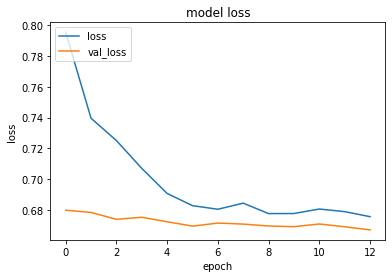

In [ ]:
#Model 3: Putting it all together. including matplotlib to help graph out the loss to see if loss has terminally halted

#Comments are not repeated as they have been refrenced in previous models. The role of each layer, and feature is only combined.

#Large model with dropout layers.

import matplotlib.pyplot as plt
custom_early_stopping = EarlyStopping(
    monitor='val_Accuracy',
    patience=8,
    min_delta=0.001,
    mode='max'
)
#Early stopping still implemented: Saves memory and decreases chances of loosing accuracy rates due to overfitting
model3 = Sequential()

model3.add(Dense(100, input_dim = X_train.shape[1], activation= 'relu'))
model3.add(Dropout(0.8))
model3.add(BatchNormalization())
model3.add(Dense(100, activation = 'relu'))
model3.add(Dropout(0.8))
model3.add(Dense(1, activation = 'sigmoid'))

model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['Accuracy'])
model3Data = model3.fit(X_train, Y_train, batch_size = 5, epochs = 100, validation_split=0.25, callbacks = custom_early_stopping,  verbose = 2)
print(model3Data.history.keys())
#Plotting loss
#plotting loss to determine whether the loss has reached it's maximum.
plt.plot(model3Data.history['loss'])
plt.plot(model3Data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()
#After plotting loss, it seems as if total loss and validation loss has reached the minimum, meaning the loss has reached it's asymptote, loss can no longer be reduced from the model.



In [ ]:
modelResult3 = model3.evaluate(X_test, Y_test)
print('Testing Accuracy: ', modelResult3[1]*100)
#Testing accuracy = 61.28, could be improved

21/21 [==============================] - 0s 2ms/step - loss: 0.6655 - Accuracy: 0.6265
Testing Accuracy:  62.65243887901306


In [ ]:
#Determining the indexes of the variables for the plt.plot()
print(model3Data.history.keys())

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])


**Final Model Test evaluations**

Through implementing everything from the first trials of model1 to the 3rd trials of model3, the training and testing accuracy of the first model is still relatively low with merely low 60% training and testing accuracy rates. Overfitting was the first issue that was attempted to be solved; after adding more dropout layers and adjusting to make smaller neural networks the issue seemed to have been fixed. The problem was that even though loss kept decreasing the accuracy hardly increased (remained constant), which was a clear sign of overfitting from the initial model. After using a smaller model another problem has emerged, which was the sign that due to the high amount of epochs set, the model kept increasing epochs even though accuracy and val_accuracy kept decreasing, meaning the model kept re-training even with lower accuracy rates, again a clear sign of overfitting. The easiest way to solve this issue was to implement a Keras EarlyStopping method which would ensure that the model stopped if the val_accuracy was decreasing or remaining constant, automatically ensuring that the model would not overfit. Not only would EarlyStopping prevent overfitting, but it would also prevent unnecessary amounts of memory being used because of unnecessary re-running the model (increasing the epochs).

After best efforts to prevent overfitting through many ways, it became clear that it wasn’t actually the model’s fault that the accuracy was not rising after reaching the low 60% range. Instead the problem was that the training and testing accuracy of the model was low as the minimum loss was too high that it affected the model from increasing its accuracy rates. The accuracy rates of the model even after it has reached the minimum of the loss is still not very high, signaling a possible issue with nothing other than the data.

Data analysis has already indicated a prevalent issue with the data, that there is not really a way to sort potable and non-potable water as the distribution of the characteristics are so similar. Additionally, after having to remove ph, Sulfate, and Trihalomethanes data, the model had less data points to determine whether or not the water was actually potable or not, and therefore patterns and trends are less prevalent.


**Second model: KNeighborsClassifier Model (KNN)**

The KNN model is incredibly simple and easy to use meaning that only the training and testing data is required alongside the n_neighbors index. The n_neighbors can best be determined by graphing out all the data points and determining/calculating the distance between each data point; however, as that concept/method is out of the current curriculum (to determine the n_neighbors index with great precision), it was significantly more efficient/easier just to loop KNN models from n_neighbors values of 1 to 100 to determine what n_neighbors would lead to maximum accuracy rates. This was achieved through creating an array and storing all the accuracy of each model.

In [ ]:
#KNN Model testing

from sklearn.neighbors import KNeighborsClassifier

# Importing and fitting KNN classifier for k=3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,Y_train)
knn.score(X_test, Y_test) #Testing accuracy, only testing accuracy will be tested in KNN models.

# try K=1 through K=100 and record testing accuracy
k_range = range(1, 101)

# store all the trials with differing n_neighbors to determine which models determine the perfect fit in order to maximize accuracy rates
scores = []

# We use a loop through the range 1 to 100
# We append the scores in the array
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_test, Y_test))

print(scores)
max = np.max(scores) #Use python array methods to determine the maximum value and the index of the maximum value
max_index = scores.index(max)

print(max, max_index)
#Through the KNN model, we know that 0.614329 is the highest model accuracy rate when n_neighbors = 17

[0.5365853658536586, 0.586890243902439, 0.5625, 0.5838414634146342, 0.5670731707317073, 0.5975609756097561, 0.600609756097561, 0.600609756097561, 0.5975609756097561, 0.5990853658536586, 0.5990853658536586, 0.5990853658536586, 0.5884146341463414, 0.6036585365853658, 0.5914634146341463, 0.600609756097561, 0.5929878048780488, 0.614329268292683, 0.6021341463414634, 0.6036585365853658, 0.5945121951219512, 0.6082317073170732, 0.6036585365853658, 0.6036585365853658, 0.6051829268292683, 0.6021341463414634, 0.5945121951219512, 0.5929878048780488, 0.5838414634146342, 0.5853658536585366, 0.5792682926829268, 0.586890243902439, 0.5777439024390244, 0.5960365853658537, 0.5823170731707317, 0.5945121951219512, 0.5929878048780488, 0.5929878048780488, 0.5945121951219512, 0.5975609756097561, 0.5990853658536586, 0.5945121951219512, 0.5884146341463414, 0.600609756097561, 0.5884146341463414, 0.5899390243902439, 0.586890243902439, 0.5945121951219512, 0.5929878048780488, 0.6036585365853658, 0.6021341463414634,

Evaluations

The KNN model lacks configurations compared to the Keras sequential model, and therefore it was hard to customize in order to create a model with the highest accuracy points. However, through looping through models with various n_neighbors, it was efficeint to find the n_neighbors index in order to maximize the testing accuracy rates. The conclusion was that the highest accuracy was 0.614329 with an n_neighbors index of 17.

Using a different model, the testing accuracy rate is still stuck in the low 60% range, meaning that after using two models, as the testing accuracy is basically stuck at the low 60% range, it is safer to assume that the relative low accuracy rates is not the fault of the models itself, but rather the consequence of faulty and insufficient input data.  




**Final Model: Random Forest Classifier Model**

In [ ]:
#Last model: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
#n_estimators basically signifies # of trees in the forest, increasing n_estimators could lead to overfitting
#entropy is a type of random forest, other than the Gini has values inside [0, 0.5] while the entropy has [0,1]
classifier.fit(X_train,Y_train)
#Fit the random seed model, run the model through training data. Same as Keras Sequential model.
classifier.score(X_test, Y_test)
#Testing accuracy of the model.

classifier_range = range(1, 101)
classifier_scores = []
#Appending classifier scores into an array to determine which index would lead to maximum testing accuracy and the index of the max, which would lead to being able to find the right accuracy.

for i in classifier_range:
  classifier = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0)
  classifier.fit(X_train,Y_train)
  classifier_scores.append(classifier.score(X_test, Y_test))

print(classifier_scores) #Same array methods in order to find the maimum acc rate and testing accuracy
max_c = np.max(classifier_scores)
max_index_c = classifier_scores.index(max_c)

print(max_c, max_index_c)


[0.5259146341463414, 0.6021341463414634, 0.5792682926829268, 0.6051829268292683, 0.5655487804878049, 0.6067073170731707, 0.5838414634146342, 0.5914634146341463, 0.5762195121951219, 0.6036585365853658, 0.5929878048780488, 0.5960365853658537, 0.5777439024390244, 0.5945121951219512, 0.5838414634146342, 0.6051829268292683, 0.586890243902439, 0.5914634146341463, 0.5914634146341463, 0.6051829268292683, 0.6082317073170732, 0.6341463414634146, 0.614329268292683, 0.6097560975609756, 0.6021341463414634, 0.614329268292683, 0.6173780487804879, 0.6204268292682927, 0.6082317073170732, 0.6097560975609756, 0.5945121951219512, 0.600609756097561, 0.5960365853658537, 0.5990853658536586, 0.5899390243902439, 0.600609756097561, 0.5960365853658537, 0.6082317073170732, 0.5853658536585366, 0.6051829268292683, 0.6067073170731707, 0.5960365853658537, 0.5884146341463414, 0.600609756097561, 0.6051829268292683, 0.6021341463414634, 0.5990853658536586, 0.5990853658536586, 0.5914634146341463, 0.5990853658536586, 0.591

I only used an extremely simple random forest classifier due to inexperience (There could be more customization with a random forest model (eg. min_sample_leaf) ; however, I have still been able to determine the best n_neighbors value and the accuracy rate of the value, which was 95 and 0.6402 respectively.

The random forest model als only determines a testing accuracy of around mid-60%, a relatively low testing accuracy rate, after running the data in 3 unique models, the machine still cannot determine an accuracy rate of above 80%, meaning that after trials of different models, it is becoming more apparent that the model may not be at fault, and rather that the input data is faulty.


# **CONCLUSION**
The conclusion is clear, that it is difficult to run a machine learning model through the characteristics of water that has been used to determine the potability of the water. The primary reason for the accuracy could be traced back to the difficulty of determining whether or not water is actually potable or not, as seen through the data analysis, it is clear that potable or non-potable water has very similar levels of each of the characteristics, and it is difficult to determine the levels of certain characteristics as they are so similar among non-potable and potable water. Every single minute detail matters when determining the potability of water, and therefore the attention to detail and precision required makes classification through machine learning ever more harder. The problem was exacerbated by needing to remove entire columns of data due to counts of missing data, and therefore, since the machine had less data points to reference while training, the consequence was that the model had a relatively lower accuracy rate. After using 3 unique machine learning models, and with all 3 of them having very similar testing accuracy rates, it is safe to conclude that the data is more problematic rather than the model itself.

To increase the accuracy of determining water potability, there could definitely be more accurate and less faulty data. The CSV file contained a significant proportion of data that was invalid (missing), and there were too few data points (columns, characteristics of water) that the model could reference to make a prediction. In addition, there could be certain characteristics of water that could be vastly different among potable and non-potable water, and by comparing characteristics machine learning models could more easily detect potable and non-potable water. If there are certain characteristics of water that would be vastly different among potable and non-potable water, detection would be significantly accurate and easier for the model.

Lastly, instead of determining potability as either 0 or 1, even though it sounds pretty unrealistic, the data could rather be the probability that the water is potable or not, which would allow for more accurate data analysis and determine the difference of a potable water dataset and a non-potable one, the difference would be clearer rather than making potability 0 or 1. Or instead of potability, the data could measure quality, as then there could be easier detection of which factors make water of higher quality; rather, than the computer having to do the arduous task of detecting the exact minute differences which make water potable or not.
